### Write a function histEqualization which takes a grayscale image im, and applies histogram equalization on the entire image.

In [1]:
%matplotlib inline

import cv2
import numpy
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt
import math

In [2]:
img = './DIP_2019_A1/lena.jpg'
img = cv2.imread(img, 0)

In [3]:
def histEqualization(image):
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    
    cf = [0] * 256
    cf[0] = hist1[0][0]
    
    for i in range(1, 256):
        cf[i] = cf[i-1] + hist1[i][0]
        
    for i in range(0, 256):
        if hist1[i][0] == 0:
            cf[i] = 0
    
    for i in range(0, len(cf)):
        cf[i] = (cf[i]/img.size)*255
    
    for i in range(0, len(cf)):
        cf[i] = math.floor(cf[i])
        
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            for k in range(0, 256):
                if img[i][j] == k:
                    img[i][j] = cf[k]
                    break
    return img

In [4]:
img_r = histEqualization(img)

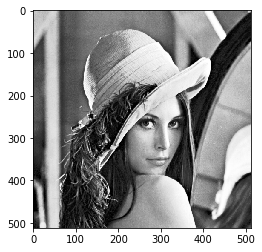

In [17]:
plt.imshow(img_r, cmap='gray')
plt.show()